# Example of L1C file reader

## Load the library

In [21]:

# from src.nasa_pace_data_reader import L1
from nasa_pace_data_reader import L1
from nasa_pace_data_reader import plot
import importlib

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

### Read the netCDF4 file

Specify the filename and location of netCDF file

In [22]:
# reload the module (This is needed only if the module is changed)(used for debugging and development)
importlib.reload(L1)

# Location of the file
fileName = '/Users/aputhukkudy/Downloads/PACE_HARP2.20220321T101844.L1C.5.2KM.V03.SIM2.1_.nc'

# Read the file
l1c = L1.L1C()
l1c_dict = l1c.read(fileName)

# Print the keys and the shape of the data
l1c_dict.keys()
for key in l1c_dict.keys():
    if key != '_units':
        print('{:<24}:{}'.format(key, l1c_dict[key].shape))

Reading HARP2 data from /Users/aputhukkudy/Downloads/PACE_HARP2.20220321T101844.L1C.5.2KM.V03.SIM2.1_.nc
latitude                :(395, 519)
longitude               :(395, 519)
scattering_angle        :(395, 519, 90)
solar_zenith_angle      :(395, 519, 90)
solar_azimuth_angle     :(395, 519, 90)
sensor_zenith_angle     :(395, 519, 90)
sensor_azimuth_angle    :(395, 519, 90)
height                  :(395, 519)
i                       :(395, 519, 90, 1)
q                       :(395, 519, 90, 1)
u                       :(395, 519, 90, 1)
dolp                    :(395, 519, 90, 1)
F0                      :(90, 1)
view_angles             :(90,)
intensity_wavelength    :(90, 1)


### Plotting the 'I'

In this section we have shown an example of plotting 'i'

In [23]:
# reload the module (This is needed only if the module is changed)(used for debugging and development)
importlib.reload(plot)

# Define the pixel
pixel = [250,300]

# Load the plot class
plt_ = plot.Plot(l1c_dict)

# set which band to plot
band = 'Blue'
plt_.setBand(band)

# Read the 'i' for a pixel
i = l1c_dict['i'][pixel[0], pixel[1], plt_.bandAngles]
print('i:', i)
print('viewing angles:', l1c_dict['view_angles'][plt_.bandAngles])


Band set to blue
i: [[142.65000915527344]
 [120.30000305175781]
 [107.30000305175781]
 [101.5]
 [101.55000305175781]
 [107.70000457763672]
 [118.55000305175781]
 [128.0]
 [134.3000030517578]
 [150.1999969482422]]
viewing angles: [-53.84 -44.96 -34.44 -22.41  -8.53   5.71  19.72  32.23  42.88  55.85]


setting dpi to 256 ppi


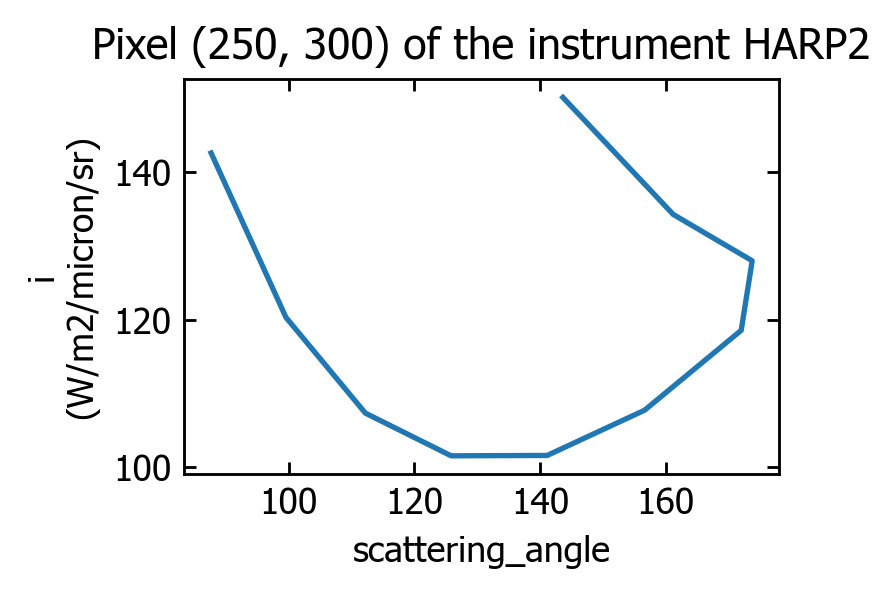

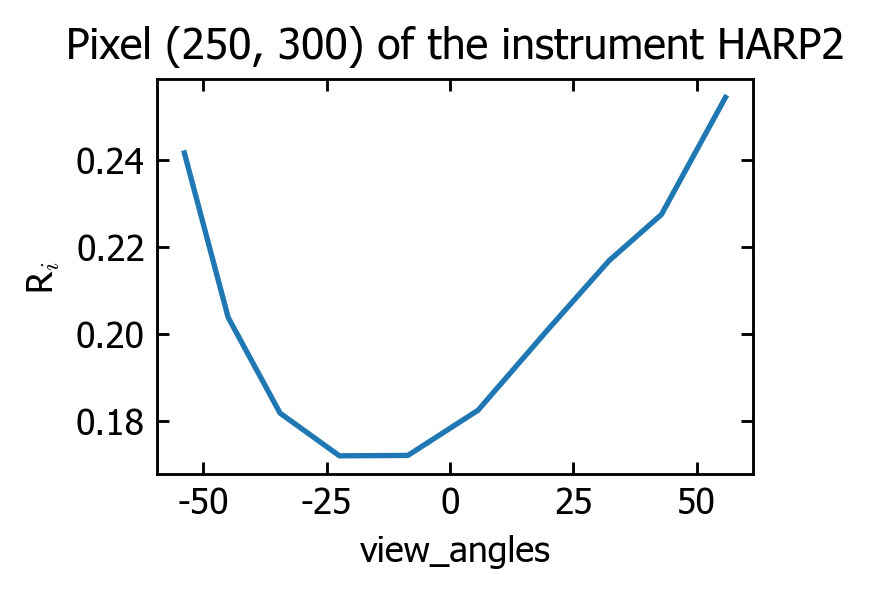

In [24]:
# Set the dpi
plt_.setDPI(256)

# Plot the pixel (By default plotting radiance)
plt_.plotPixel(pixel[0], pixel[1])

# Plot the pixel reflectance
plt_.reflectance = True
plt_.plotPixel(pixel[0], pixel[1], xAxis='view_angles')

#### Plot all bands and variables

An example to plot all variables and bands of the instrument defined

Instrument set to HARP2
...Setting the subplots with number of bands 4 and number of variables 4


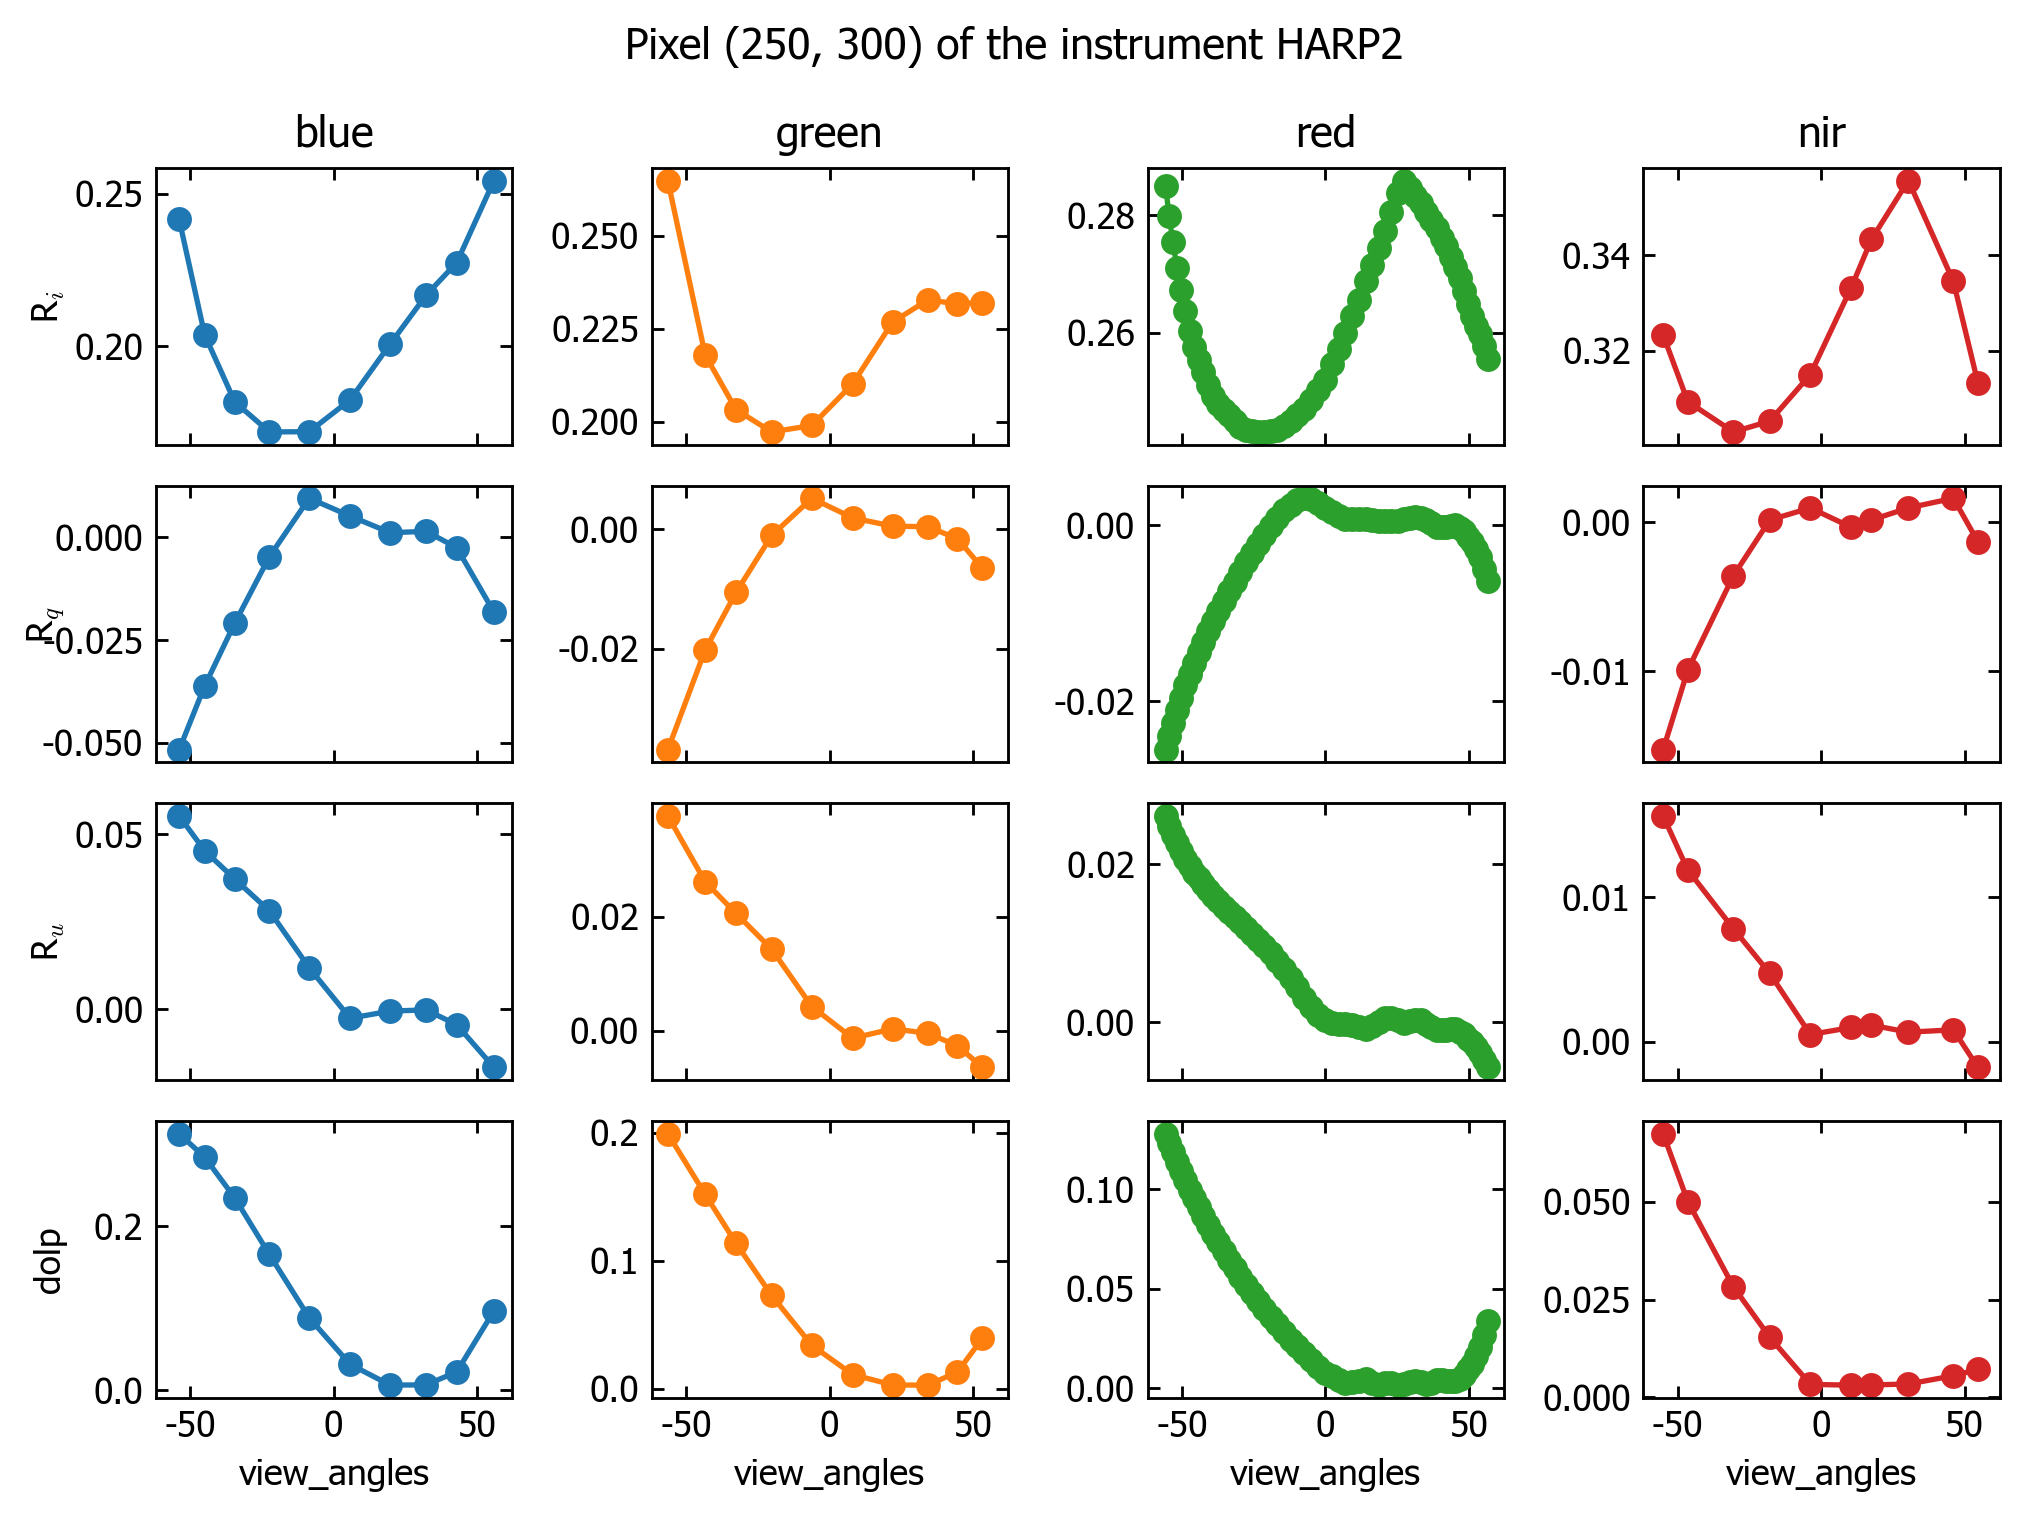

In [25]:
# define the wavelengths and variables to plot
plt_.setInstrument()

# plot all vars and bands
plt_.plotPixelVars(pixel[0], pixel[1], xAxis='view_angles')

#### Plot pixel data with selected bands and variables
Here we will show how to plot only selected bands and variables

...Setting the subplots with number of bands 2 and number of variables 2


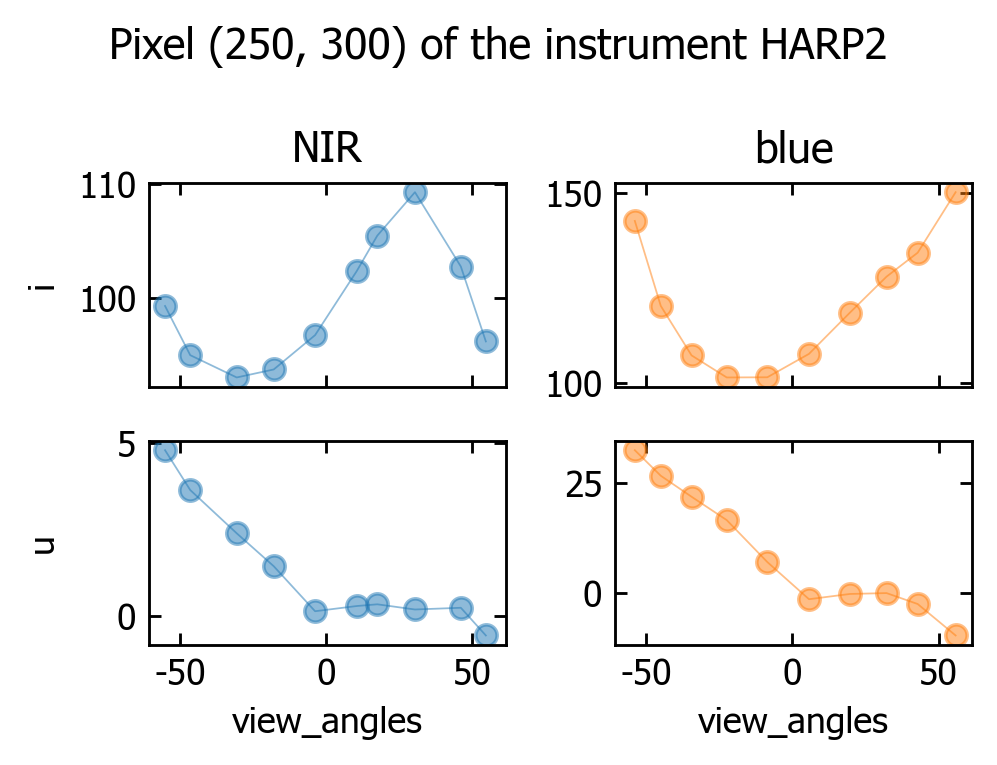

In [26]:

# plot only specific bands and vars
plt_.vars2plot = ['i',  'u']    # Order in the list is the order of plotting
plt_.bands2plot = ['NIR', 'blue']   # Order in the list is the order of plotting

# plot radiance
plt_.reflectance = False # switching back to radiance
plt_.plotPixelVars(pixel[0], pixel[1], bands= plt_.bands2plot, xAxis= 'view_angles',
                   showUnit=False, alpha=0.5, linewidth=0.5) # you can pass any other arguments to the plot function

## Create Custom RGB Images
Leverage the Plot library to generate RGB images from various viewing angles. Images default to the Nadir perspective

- Different combination of spectral bands
- contrast, (option to use individual contrast)
- 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


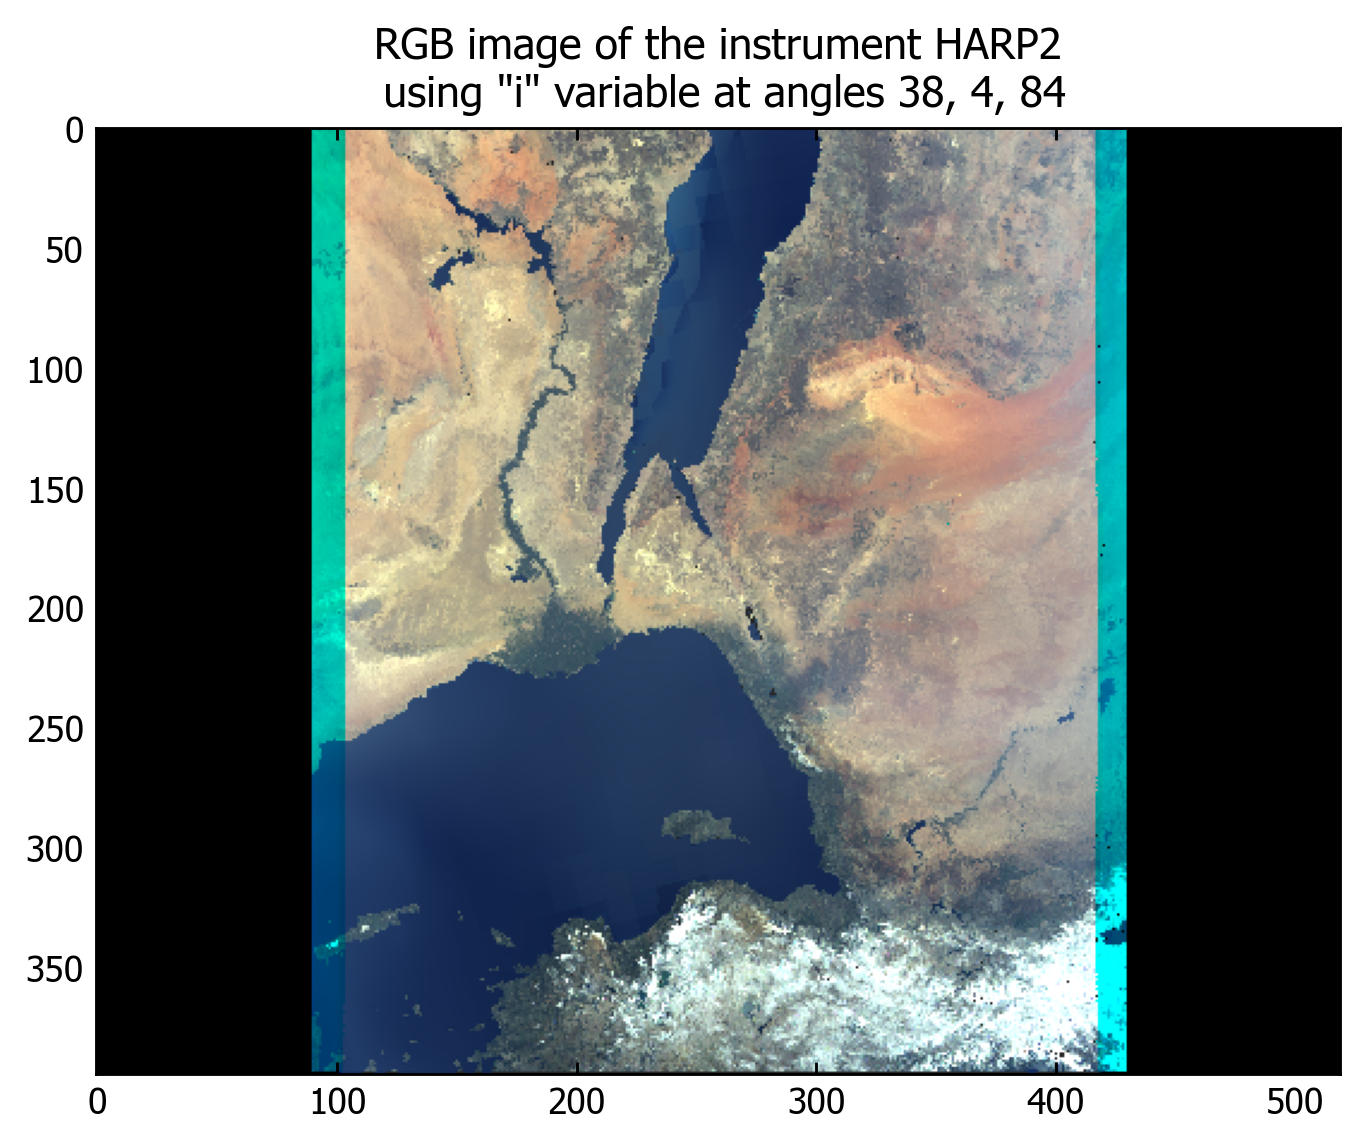

In [27]:
# plot RGB image
plt_.plotRGB(scale=1)

### Plot projected RGB

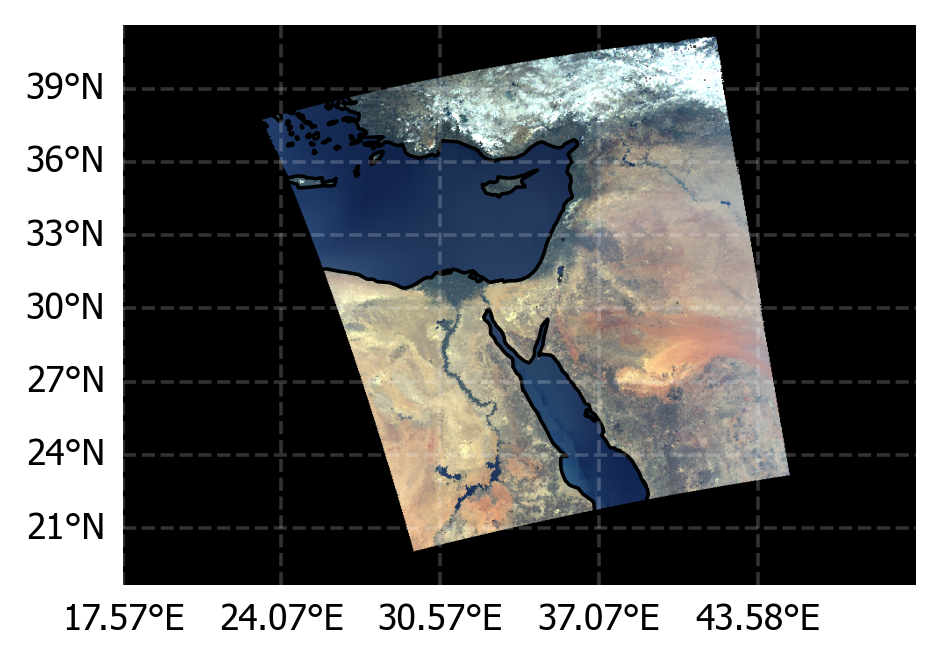

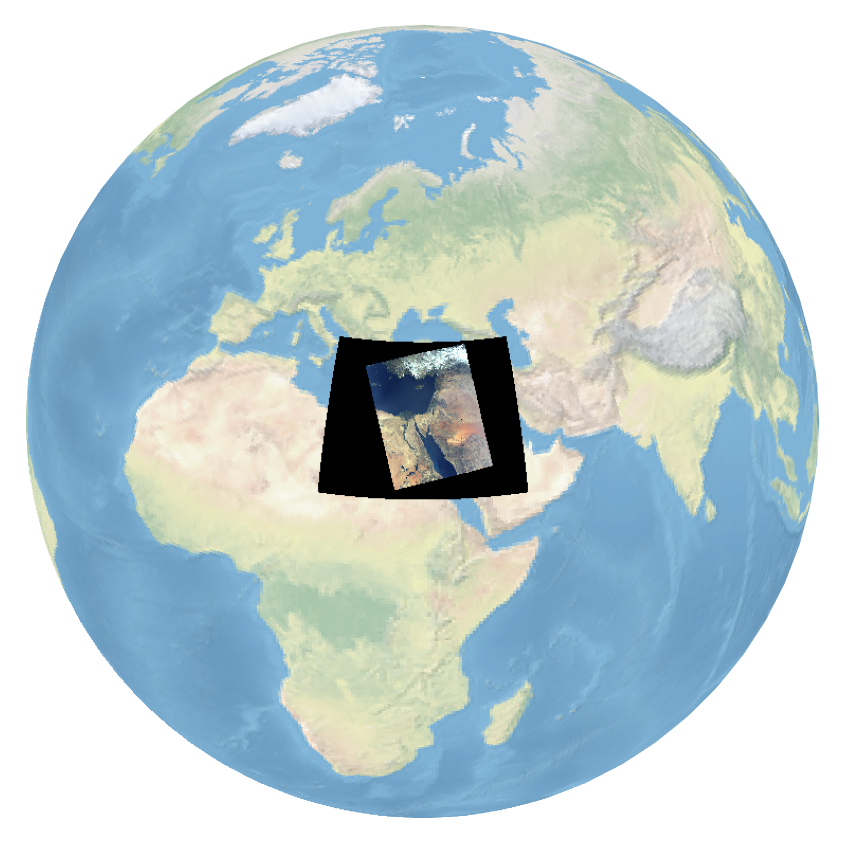

In [28]:
# plot RGB in default plate carree projection
plt_.projectedRGB()

# plot RGB in Orthographic projection
plt_.projectedRGB(proj='Orthographic')

### Plot projected variable

Band set to nir


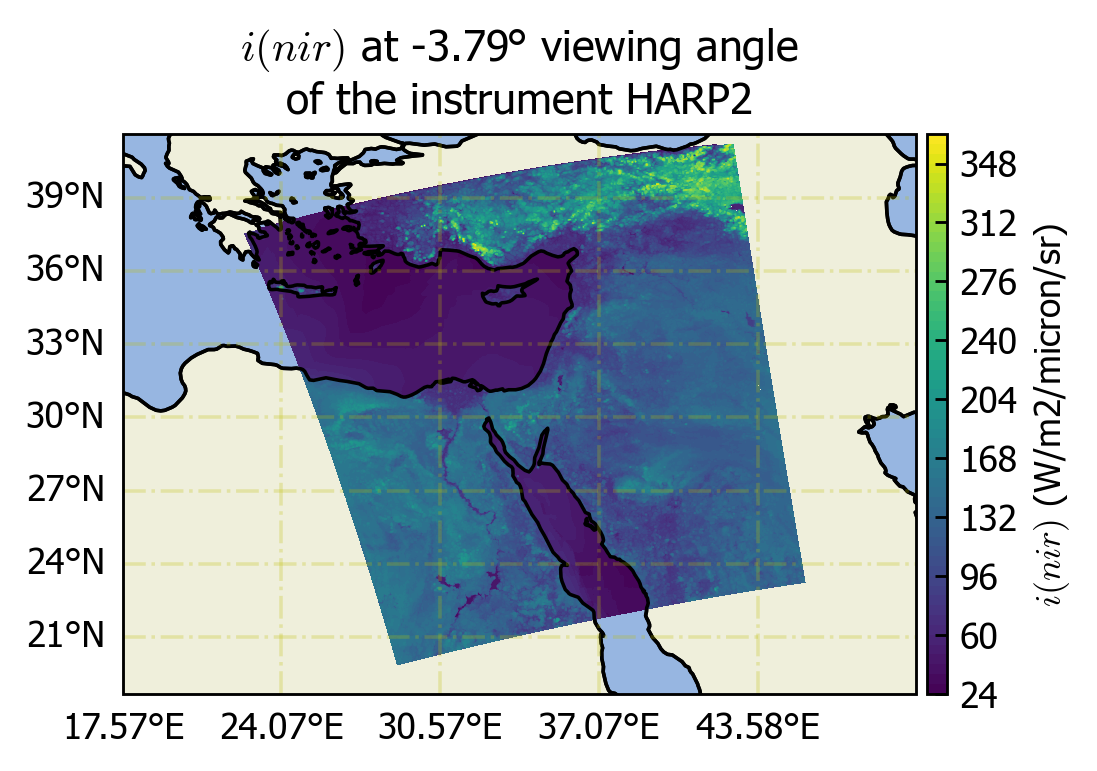

In [29]:
# plot one variable in a specific projection at closest viewing angle to nadir
band = 'nIR'
plt_.setBand(band)
plt_.projectVar('i',  dpi=300)

### Plot projected reflectance at a viewing specified

The script will find the closest viewing angle available

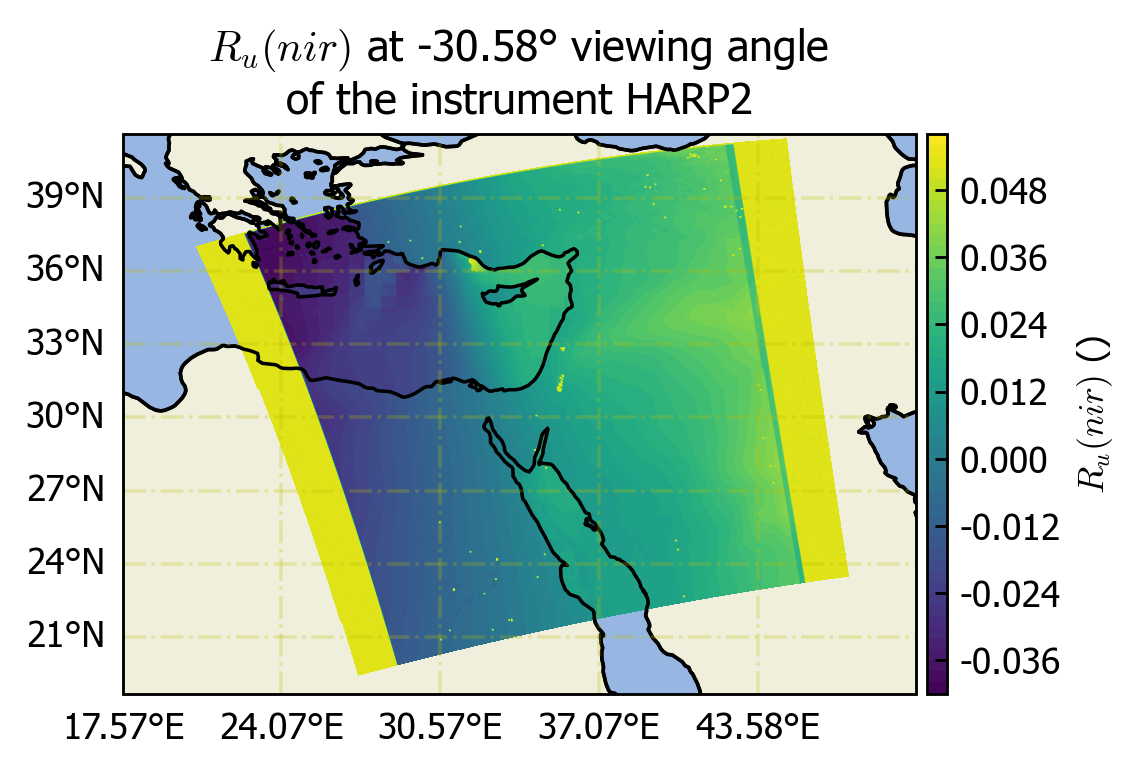

In [30]:
# Plotting reflectance at closest viewing angle to -35 degrees
plt_.reflectance = True
plt_.projectVar('u',  viewAngle=-35)